In [1]:
import sys
import torch

sys.path.append('../external/s-vae-pytorch/')
from hyperspherical_vae.distributions import VonMisesFisher, HypersphericalUniform

/home/doserbd/anaconda3/envs/spherinator/lib/python3.10/site-packages/torch/distributions/distribution.py:51: UserWarning: <class 'hyperspherical_vae.distributions.hyperspherical_uniform.HypersphericalUniform'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


tensor([[ 0.9618,  0.2738],
        [ 0.9329,  0.3603],
        [ 0.9100, -0.4147],
        ...,
        [-0.7860,  0.6182],
        [-0.8573,  0.5149],
        [-0.8268,  0.5625]])


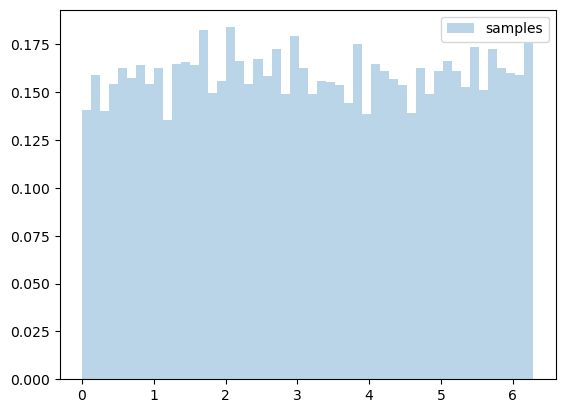

In [2]:
import matplotlib.pyplot as plt
import math

dim = 2
dist = HypersphericalUniform(dim - 1)

x = dist.sample(10000)
print(x)
plt.hist((lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:,1], x[:,0])),
         density=True, bins=50, alpha=.3, label='samples')

plt.legend()
plt.show()

torch.Size([10000, 2])


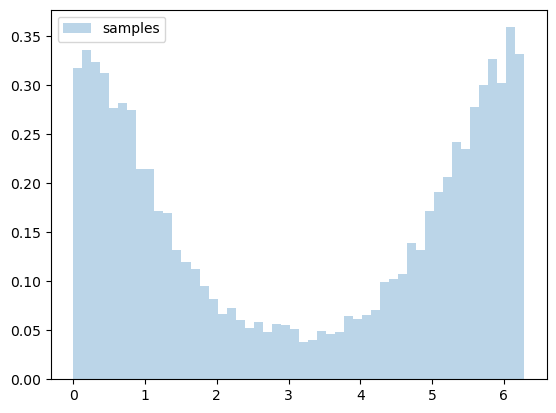

In [3]:
loc = torch.tensor([1.0, 0.0])
scale = torch.tensor([1.0])
dist = VonMisesFisher(loc, scale)

x = dist.sample(10000)
print(x.shape)
plt.hist((lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:,1], x[:,0])),
         density=True, bins=50, alpha=.3, label='samples')

plt.legend()
plt.show()

In [4]:
dim = 3
loc = torch.tensor([[0.8526, 0.5203, 0.0490], [1.0, 0.0, 0.0]])
print(loc)
scale = torch.tensor([1.0, 1.0])

dist1 = VonMisesFisher(loc, scale)
dist2 = HypersphericalUniform(dim - 1)

torch.distributions.kl_divergence(dist1, dist2)

tensor([[0.8526, 0.5203, 0.0490],
        [1.0000, 0.0000, 0.0000]])


TypeError: view() received an invalid combination of arguments - got (), but expected one of:
 * (torch.dtype dtype)
 * (tuple of ints size)
